In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [61]:
df = pd.read_csv('data/car_price_dataset.csv')

<p>ℹ️Dataset can be obtained from by running the following command on you systems bash:</p>
<p>curl -L -o ~/Downloads/car-price-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/asinow/car-price-dataset</p>
<p>Or by visiting https://www.kaggle.com/datasets/asinow/car-price-dataset and downloading the zip fileℹ️</p>

<h3>After creating the Dataframe for the dataset it is time to start exploring it!</h3>

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2011.54370,6.897699,2000.0,2006.00,2012.0,2017.0,2023.0
Engine_Size,10000.0,3.00056,1.149324,1.0,2.00,3.0,4.0,5.0
Mileage,10000.0,149239.11180,86322.348957,25.0,74649.25,149587.0,223577.5,299947.0
Doors,10000.0,3.49710,1.110097,2.0,3.00,3.0,4.0,5.0
Owner_Count,10000.0,2.99110,1.422682,1.0,2.00,3.0,4.0,5.0
Price,10000.0,8852.96440,3112.596810,2000.0,6646.00,8858.5,11086.5,18301.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


<h5>With no null values this is a simple dataset to analyze⚒️</h5>

In [64]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


<h4>Let's start by analyzing the distribution of car prices from 2000 to 2024</h4>

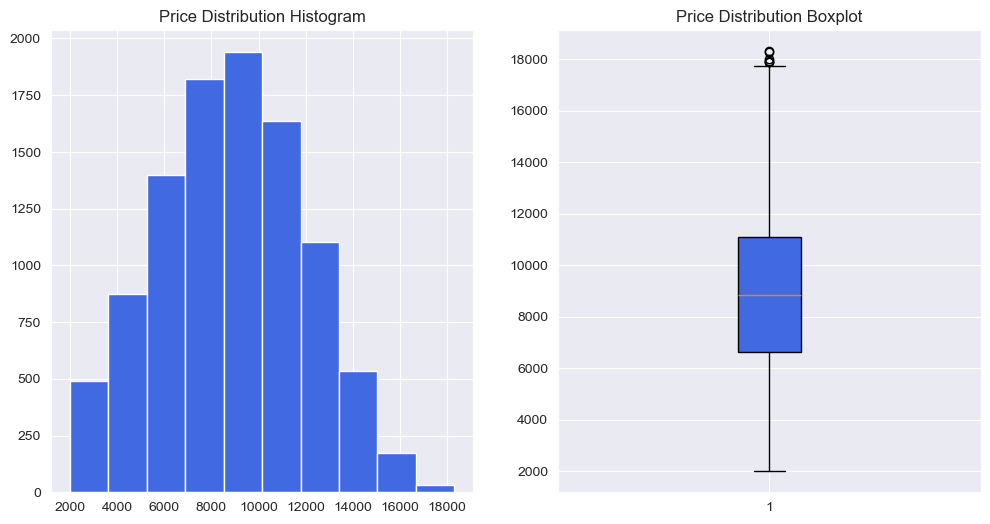

In [65]:
plt.close()
fig, axs = plt.subplots(figsize=(12,6), ncols=2)
axs[0].hist(df['Price'], color='#4169E1')
box = axs[1].boxplot(df['Price'], patch_artist=True)
box['boxes'][0].set_facecolor('#4169E1')
axs[0].set_title('Price Distribution Histogram')
axs[1].set_title('Price Distribution Boxplot')
plt.savefig('img/PriceDistribution')
plt.show()

<h4>It seems like there is a slight shift towards the left (cheaper prices) in the histogram, while boxplot shows a few outliers in the high-end of car prices, which makes sense since there is a base production price for a car but there is no real limit on how expensive a car can be.⚡</h4>

<h4>Let's try to see if there is a strong correlation between any of the numerical values🔎</h4>

In [66]:
df_corr = df.select_dtypes(include=['float', 'int']).corr()
df_corr

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
Year,1.000000,-0.001306,-0.002476,0.014867,0.000116,0.663036
Engine_Size,-0.001306,1.000000,0.015135,-0.009844,0.007122,0.357403
Mileage,-0.002476,0.015135,1.000000,0.007879,0.006287,-0.551227
Doors,0.014867,-0.009844,0.007879,1.000000,-0.005431,0.000511
Owner_Count,0.000116,0.007122,0.006287,-0.005431,1.000000,0.002656
Price,0.663036,0.357403,-0.551227,0.000511,0.002656,1.000000


<h4>This format is not easy to look at... I need to make it easy for other people to understand!</h4>

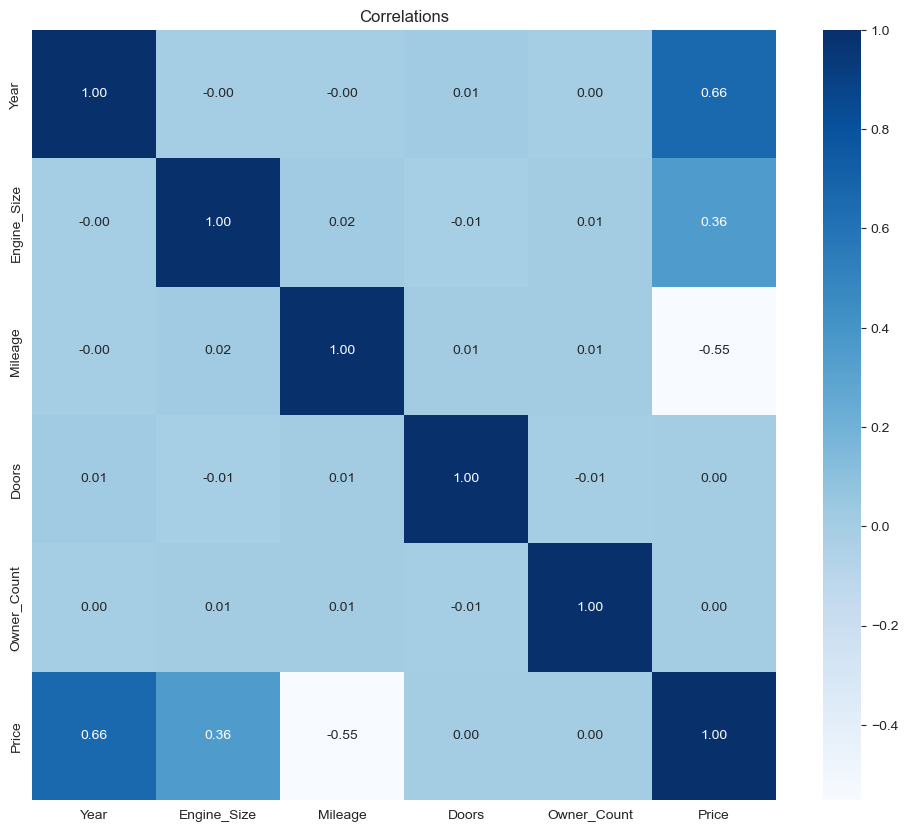

In [91]:
plt.close()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=df_corr, annot=True, cmap='Blues', fmt='.2f')
ax.set_title('Correlations')
plt.savefig('img/Heatmap')
plt.show()

<h4>This is a lot Better! Now I can see that there are some normal and inverse relationships in the dataset➕➖</h4>

<h4>Before analyzing the numerical data I would like to understand more about the categorical data in the dataset📖</h4>

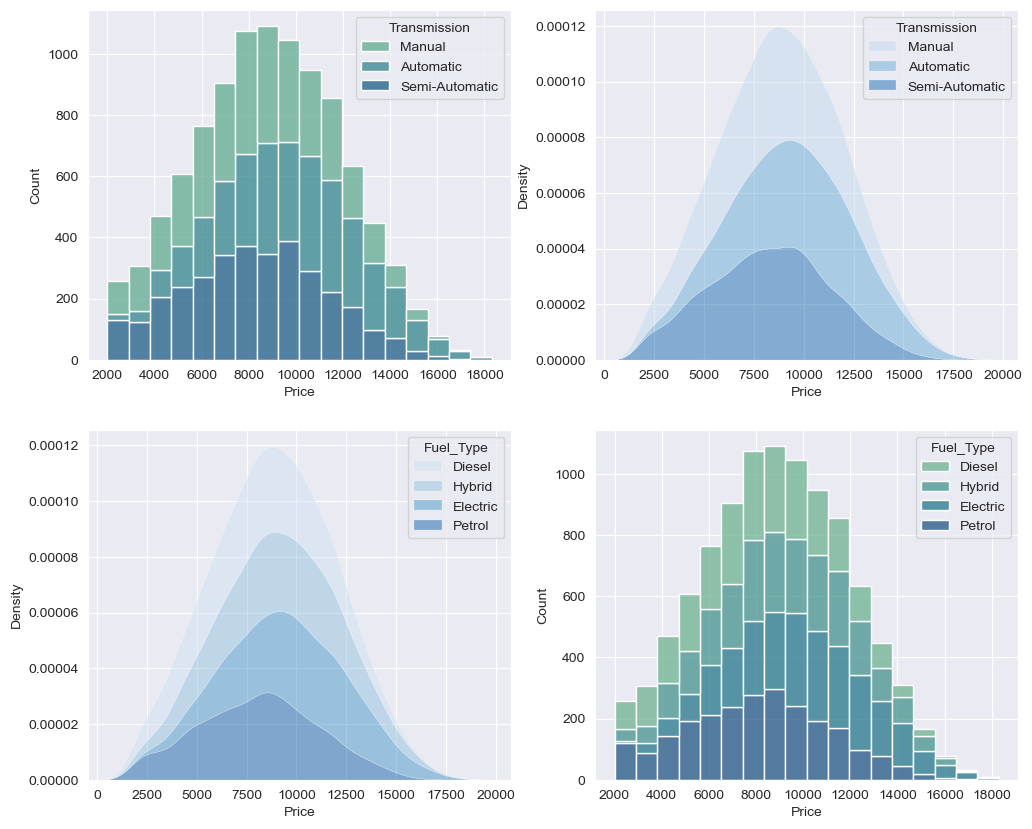

In [68]:
plt.close()
fig, axs = plt.subplots(figsize=(12,10), nrows=2, ncols=2)

sns.histplot(
    x=df['Price'],
    hue=df['Transmission'],
    binwidth=int(df['Price'].max()/20),
    palette='crest',
    multiple='stack',
    ax=axs[0,0]
)
sns.histplot(
    x=df['Price'],
    hue=df['Fuel_Type'],
    binwidth=int(df['Price'].max()/20),
    palette='crest',
    multiple='stack',
    ax=axs[1,1]
)
sns.kdeplot(
    data=df[['Price','Transmission']],
    x=df['Price'],
    hue=df['Transmission'],
    multiple='stack',
    palette='Blues',
    alpha=0.5,
    linewidth=0.15,
    ax=axs[0,1]
)
sns.kdeplot(
    data=df[['Price','Transmission']],
    x=df['Price'],
    hue=df['Fuel_Type'],
    multiple='stack',
    palette='Blues',
    alpha=0.5,
    linewidth=0.15,
    ax=axs[1,0]
)
plt.savefig('img/CategoricalDistribution')
plt.show()

<h4>There are some interesting finds in here!</h4>
<h5>The graphs at the top show how there is a greater quantity of manual and semi-automatic cars in the lower end of the price spectrum, while on the higher end automatic cars start to become more common, to the point that there is more automatic cars than both manual and semi-automatic</h5>
<h5>A similar behaviour appears in the bottom charts, with electrical cars being less common in the lower end of the price spectrum than on the higher end.</h5>
<h5>Interestingly there appears to be a balance in the middle point of the price values where all types of cars appear to be available.</h5>

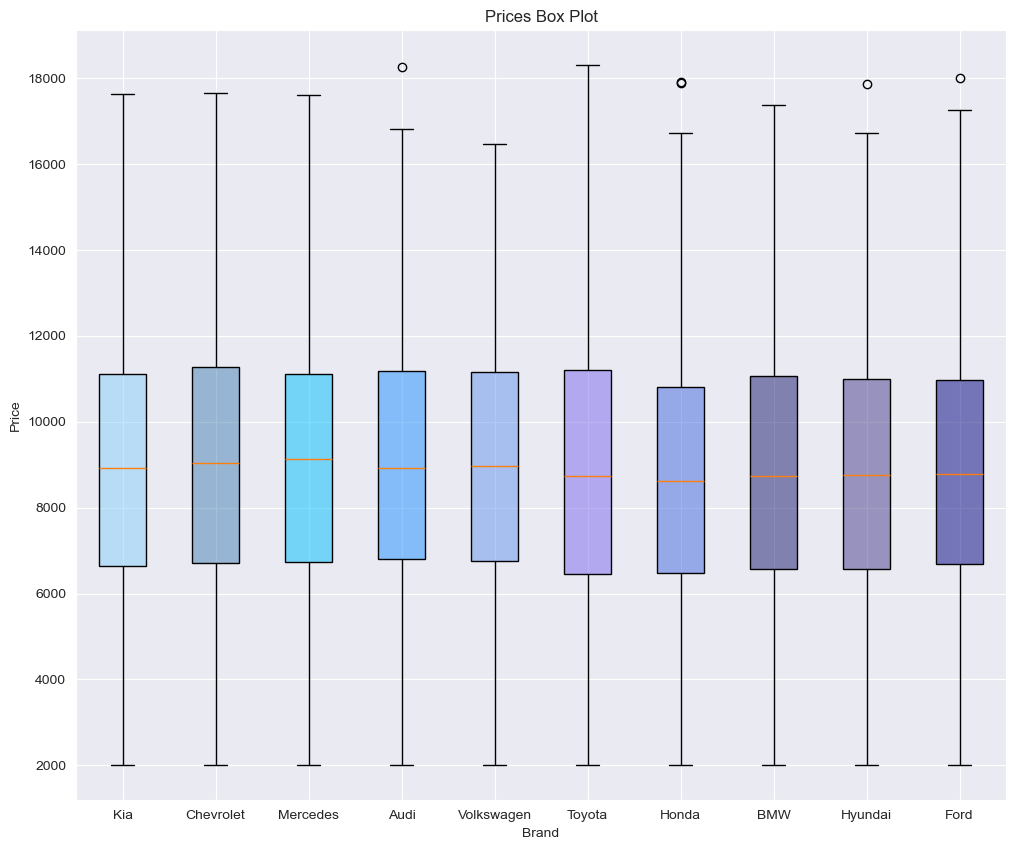

In [69]:
BrandDivided = {c : df[df['Brand']==c] for c in df['Brand'].unique()}
nBrandDivided = []
for k, i in BrandDivided.items():
    nBrandDivided.append(i['Price'])
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlabel('Brand')
ax.set_ylabel('Price')
ax.set_title('Prices Box Plot')
bplot = ax.boxplot(nBrandDivided,
           patch_artist=True,
           tick_labels=df['Brand'].unique()
           )
blue_shades = [
    "#87CEFA80",  # Light Sky Blue
    "#4682B480",  # Steel Blue
    "#00BFFF80",  # Deep Sky Blue
    "#1E90FF80",  # Dodger Blue
    "#6495ED80",  # Cornflower Blue
    "#7B68EE80",  # Medium Slate Blue
    "#4169E180",  # Royal Blue
    "#19197080",  # Midnight Blue
    "#483D8B80",  # Dark Slate Blue
    "#00008080"   # Navy Blue
]
for patch, color in zip(bplot['boxes'], blue_shades):
    patch.set_facecolor(color)

plt.savefig('img/PriceRangeBox')

plt.show()

<h4>The graph above is a more detailed view of the first boxplot of price distribution. Now the Prices are grouped by Brand, and we can see that all brands have the same base price for cars but Toyota has the highest ceiling.</h4>

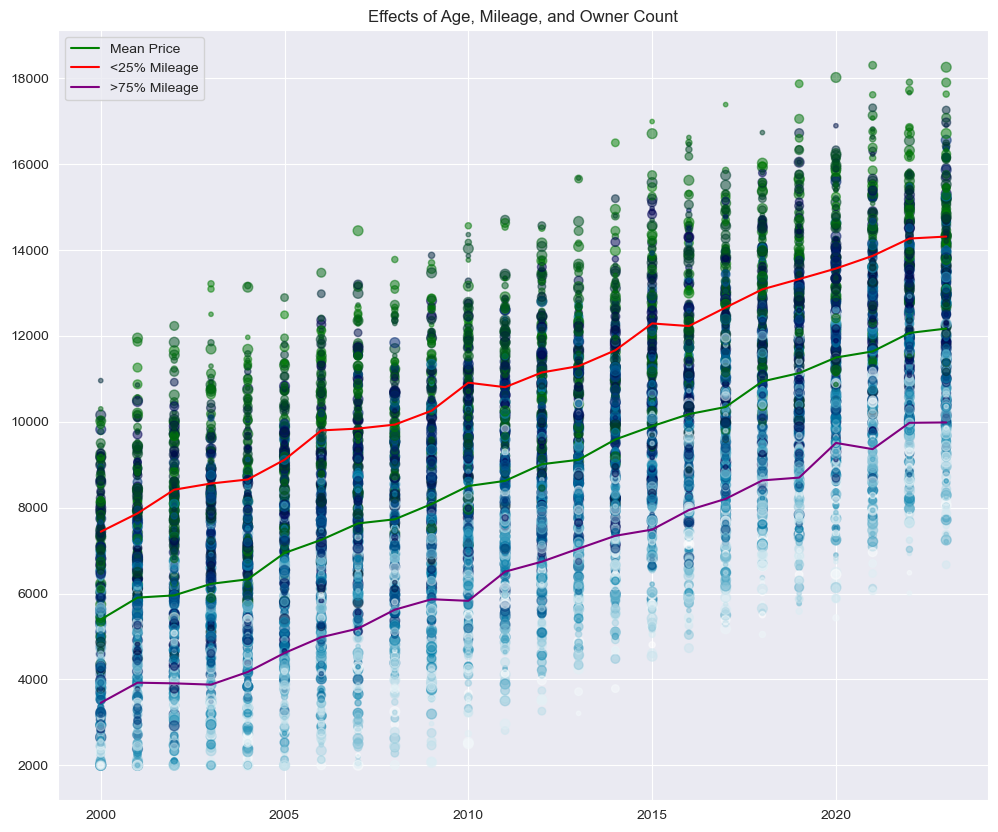

In [90]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))
years = df['Year'].unique() #simply the years 2000-2024
mean_price_per_year = df[['Year', 'Price']].groupby(['Year']).mean().reset_index()['Price'] #This is the mean price for a given year
miles_car_bottom = df[['Mileage', 'Year']].groupby(['Year']).quantile(0.25).reset_index() #This is the mileage in the bottom 25 quantile
price_miles_bottom = []
for miles, year in zip(miles_car_bottom['Mileage'], miles_car_bottom['Year']):
    price_miles_bottom.append(df[(df['Mileage'] < miles) & (df['Year'] == year)]['Price'].mean().item()) #When conditions met get mean price of that item
miles_car_top = df[['Year', 'Mileage']].groupby(['Year']).quantile(0.75).reset_index() #This is the mileage in the top 25 quantile
price_miles_top = []
for miles, year in zip(miles_car_top['Mileage'], miles_car_top['Year']):
    price_miles_top.append(df[(df['Mileage'] > miles) & (df['Year'] == year)]['Price'].mean().item())
years.sort()
ax.scatter(x=df['Year'], y=df['Price'], s=df['Owner_Count']*10, c=df['Mileage'], alpha=0.5, cmap='ocean')
ax.plot(years, mean_price_per_year, color='green', label='Mean Price') #Plots average price over time
ax.plot(years, price_miles_bottom, color='red', label='<25% Mileage') #Plots average price over time of cars with the 25% LEAST mileage
ax.plot(years, price_miles_top, color='purple', label='>75% Mileage') #Plots average price over time of cars with the 25% MOST mileage
ax.legend()
ax.set_title('Effects of Age, Mileage, and Owner Count')
plt.savefig('img/ScatterEffects')
plt.show()

<h4>There is 4 different graphs with a lot of information in the scatter/line plot above.🔎</h4>
<h5>I will explain the main characteristics of the graph.</h5>
<h5>The color in the scatter plot represents mileage, higher mileage is closer to blue color, while lower mileage is closer to green color. This demonstrates the inverse relationship between price and mileage.⤵️</h5>
<h5>Then we have size of each point in the scatter plot showing number of owners for a car, we can see that there is no relationship with price, and this supports our heatmap from the start of the exposition.✖️</h5>
<h5>The most important piece of information here is the x-axis vs the y-axis, or year manufactured vs price. There is little relationship between price and year for cars are that are >15 years old, but for cars newer than that there is a strong relationship between price and year.⤴️</h5>
<h5>Finally the three line plotted in the graph represent the mean price for all the cars in a given year (green), the mean price for all the cars in a given year with a mileage in the bottom 25% quantile (purple), and the mean price for all the cars in a given year with a mileage greater than the bottom 75% quantile (red). This lines help represent the inverse relationship between mileage and price.⤵️</h5>

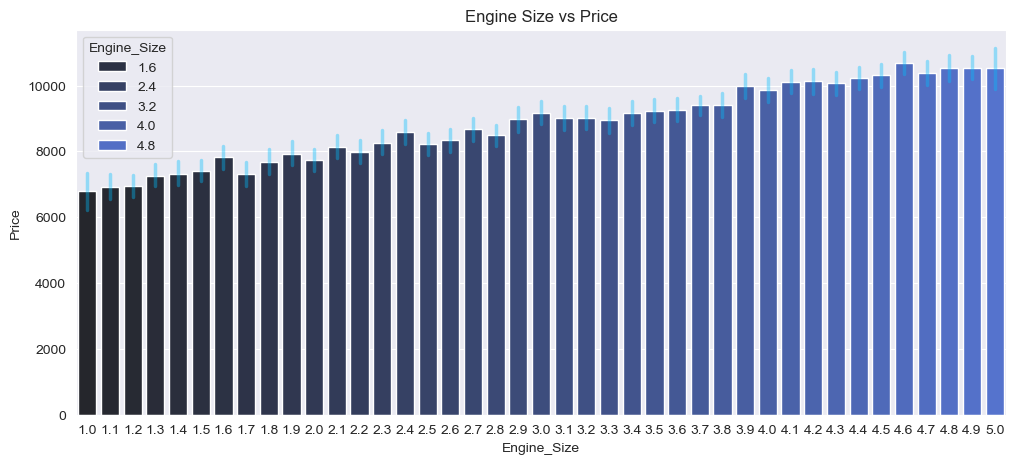

In [96]:
plt.close()
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=df['Engine_Size'],
            y=df['Price'],
            hue=df['Engine_Size'],
            palette='dark:#4169E1',
            err_kws={"color": "#00BFFF60", "linewidth": 2.5},
            errorbar=('ci', 95)
            )
df_mean_price_eng_size = df[['Price', 'Engine_Size']].groupby(['Engine_Size']).mean().reset_index()
ax.set_title('Engine Size vs Price')
plt.savefig('img/EngineSize')
plt.show()

<h4>The above bar graph follows an upward trend, where an increase in engine size tends to lead to an increase of price⤴️<h4>

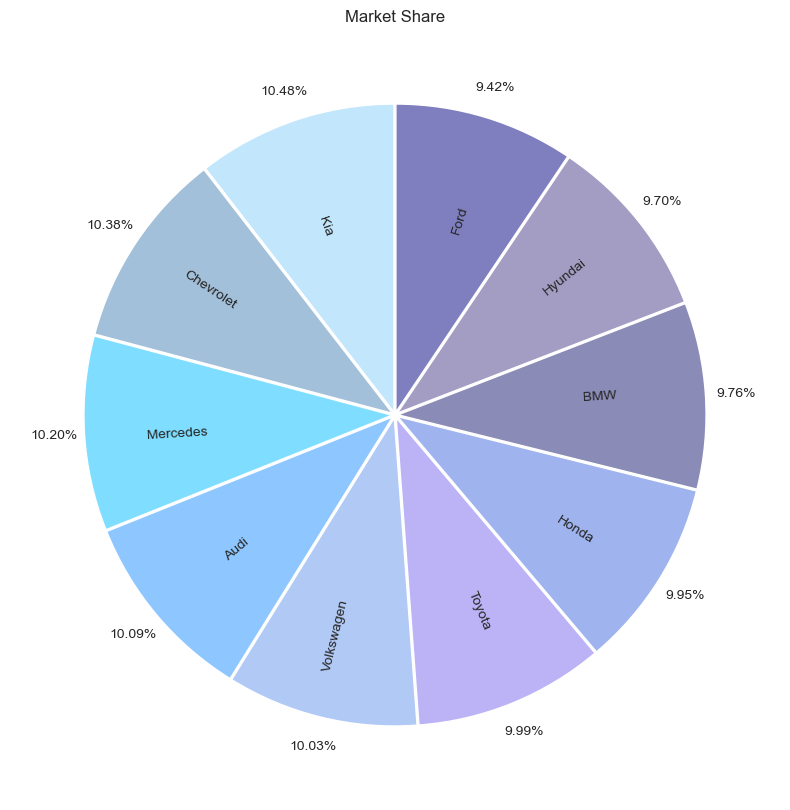

In [92]:
plt.close()
plt.colormaps()
brand_share = df['Brand'].value_counts()
brands = df['Brand'].unique()
blue_shades = [
    "#87CEFA80",  # Light Sky Blue
    "#4682B480",  # Steel Blue
    "#00BFFF80",  # Deep Sky Blue
    "#1E90FF80",  # Dodger Blue
    "#6495ED80",  # Cornflower Blue
    "#7B68EE80",  # Medium Slate Blue
    "#4169E180",  # Royal Blue
    "#19197080",  # Midnight Blue
    "#483D8B80",  # Dark Slate Blue
    "#00008080"   # Navy Blue
]
fig, ax = plt.subplots(figsize=(12,10))
ax.pie(x=brand_share,
       labels=brands,
       startangle=90,
       autopct='%1.2f%%',
       pctdistance=1.1,
       labeldistance=0.6,
       explode=np.ones(shape=len(brands))*0.01,
       rotatelabels=90,
       colors=blue_shades
       )
ax.set_title('Market Share')
plt.savefig('img/MarketShare')
plt.show()

<h4>The pie chart represents the market share for the car manufacturers. Kia is in the first place at 10.48%, while the lowest is Ford at 9.42% market share</h4>

<h3>I will start to use ML models to predict car prices using the features we determined had a relationship with Price</h3>

In [73]:
from sklearn.preprocessing import MinMaxScaler #Normalizes values to 0 to 1 values
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #Hyperparametization optimization
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [74]:
scaler = MinMaxScaler()

df['Norm_Mileage'] = scaler.fit_transform(df[['Mileage']]).round(4)
df['Norm_Year'] = scaler.fit_transform(df[['Year']]).round(4)
df['Norm_Eng'] = scaler.fit_transform(df[['Engine_Size']]).round(4)
df['Norm_Owner'] = scaler.fit_transform(df[['Owner_Count']]).round(4)
df['Norm_Doors'] = scaler.fit_transform(df[['Doors']]).round(4)
df
#df['Mileage'] = (df['Mileage'] - df['Mileage'].min()) / (df['Mileage'].max() - df['Mileage'].min())
#Normalization method

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Norm_Mileage,Norm_Year,Norm_Eng,Norm_Owner,Norm_Doors
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,0.9666,0.8696,0.800,1.00,0.3333
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,0.0178,0.5217,0.250,0.50,0.0000
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,0.7716,0.8696,0.800,0.25,0.6667
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,0.5366,1.0000,0.250,0.00,0.0000
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,0.9556,0.1304,0.400,0.50,0.3333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884,0.0192,0.1739,0.675,0.75,0.0000
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240,0.5601,0.0870,0.100,0.00,0.0000
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866,0.2889,0.4348,0.500,0.00,1.0000
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084,0.7527,0.0870,0.100,0.00,0.6667


<h4>I wanted to find the differences between a model that used normalized values an a model using the values from the original dataset</h4>

In [75]:
features = ["Year", "Engine_Size", "Mileage"]
norm_features = ["Norm_Year", "Norm_Eng", "Norm_Mileage"]
target = ["Price"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target].values.ravel(), test_size=0.3, random_state=1)

In [77]:
min_MSE = 0
max_Rsq = 0
save = 0
for i in range(10):
    model = DecisionTreeRegressor(min_samples_leaf=5+i, random_state=1)
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_predict)
    Rsq = r2_score(y_test, y_predict)
    residuals = y_test - y_predict
    if i == 0 or (MSE < min_MSE and Rsq > max_Rsq):
        save = model
        min_MSE = MSE
        max_Rsq = Rsq
y_predict = save.predict(X_test)
MSE = mean_squared_error(y_test, y_predict)
Rsq = r2_score(y_test, y_predict)
residuals = y_test - y_predict
(MSE, Rsq, save)

(np.float64(1402953.690475489),
 0.850308174356166,
 DecisionTreeRegressor(min_samples_leaf=14, random_state=1))

<h4>In this cell we can see some metrics I am using to measure the model accuracy, Mean Squared Error helps me know the total error from the entire dataset, while r2_score explains how well the model approaches to the original function📈</h4>
<h4>Also, I decided to manually find what hyperparameters are the best for the model, and after some testing it appears that 'min_samples_leaf' is the hyperparameters that matters the most in this model with this dataset.</h4>

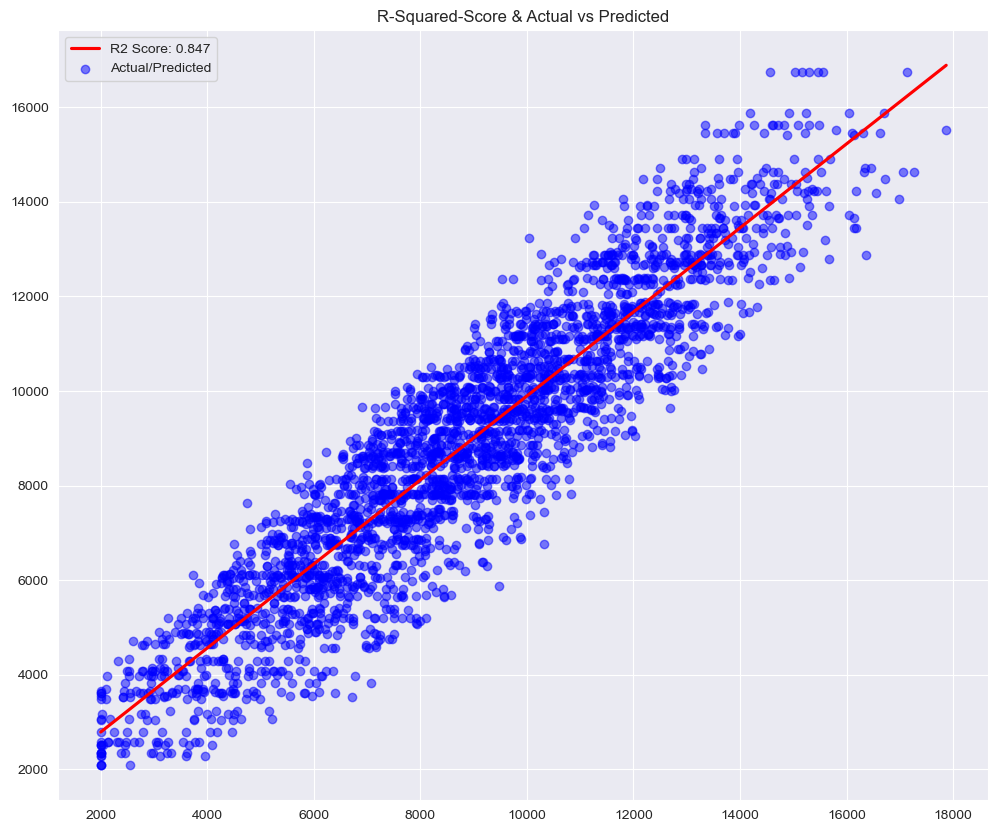

In [93]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))

line1 = sns.regplot(x=y_test, y=y_predict, line_kws={'color':'red'}, label='R2 Score: ' + str(round(Rsq,3)), scatter=False, ci=None)
ax.scatter(y_test, y_predict, alpha=0.5, c='blue', label='Actual/Predicted')

ax.legend()
ax.set_title('R-Squared-Score & Actual vs Predicted')
plt.savefig('img/ML-scatter-one')
plt.show()

<h4>The scatter plot represents the actual price vs the predicted price, the closer it is to a straight line the better, and it appears that our prediction are pretty good.</h4>
<h4>The red line in the graph is the regression line of our prediction equation.</h4>

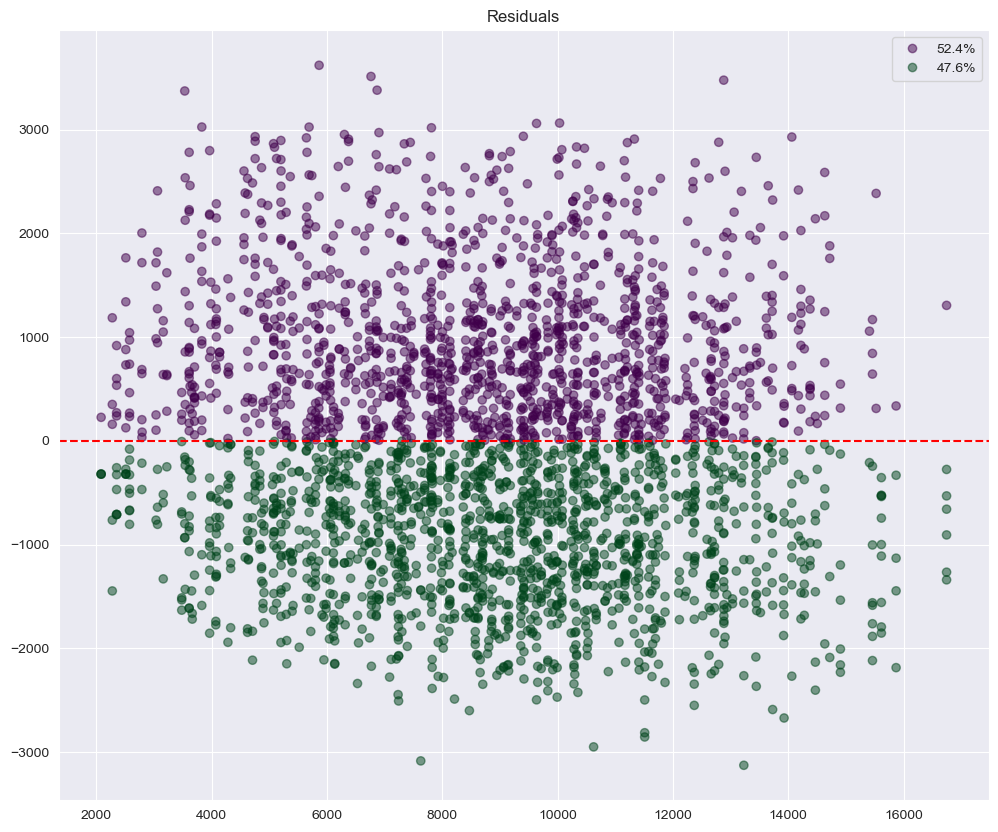

In [102]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))

colors = np.where(residuals<0, 1, -1)
values_under_zero = np.where(residuals<0, 1, 0).sum().item()
perc_vals = round((values_under_zero/len(residuals))*100,1)

scatter = ax.scatter(y_predict, residuals, c=colors, cmap='PRGn', alpha=0.5)

hand, lab = scatter.legend_elements(prop='colors')
ax.axhline(y=0.0, color='red', linestyle='--')
ax.legend(handles=hand, labels=[str(perc_vals)+'%',str(100-perc_vals)+'%'])
ax.set_title('Residuals')
plt.savefig('img/ML-scatter-two')

plt.show()

<h4>In this scatter plot graph we are looking at the residuals, the errors from our predictions. The closer they get to the red dashed line the better</h4>

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target].values.ravel(), test_size=0.3,  random_state=1)

In [81]:
parameters = {'min_samples_leaf' : [15,16,17,18,19,20]
              }
model = DecisionTreeRegressor()
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': [15, 16, 17, 18, 19, 20]})

<h4> In here I am using GridSearch in order to optimize hyperparametization. I had used more parameter before, but after some testing I discovered that 'min_samples_leaf' was the only one that had a significant positive impact.</h4>

In [82]:
(grid.best_score_, grid.best_params_)

(np.float64(0.8450033631305202), {'min_samples_leaf': 17})

In [83]:
y_predict = grid.predict(X_test)
MSE = mean_squared_error(y_test, y_predict)
Rsq = r2_score(y_test, y_predict)
residuals = y_test - y_predict
(MSE, Rsq, grid.best_params_)

(np.float64(1431408.4125552534), 0.8472721231128322, {'min_samples_leaf': 17})

<h4> These are the metric scores that I get with the best value for 'min_samples_leaf' found by using GridSearch</h4>
<h4> Interestingly they provide a lower R-squared score, and a higher mean squared error. The effects of this can be seen in the following visual </h4>

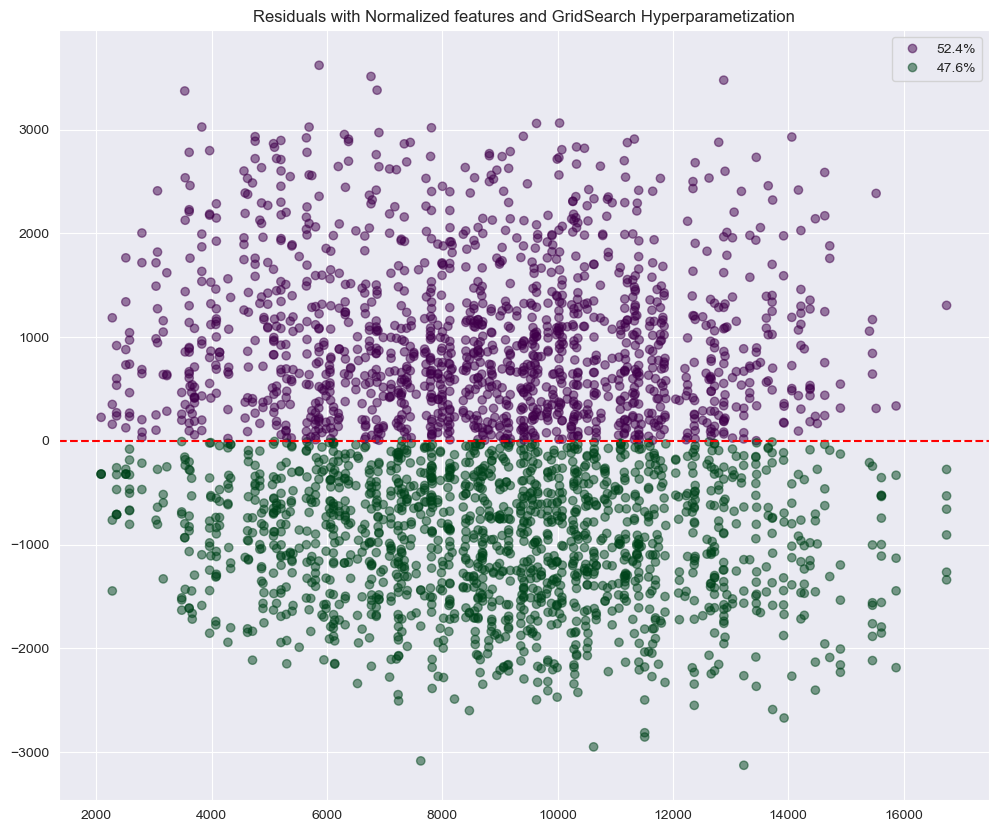

In [103]:
plt.close()
fig, ax = plt.subplots(figsize=(12,10))

colors = np.where(residuals<0, 1, -1)
values_under_zero = np.where(residuals<0, 1, 0).sum().item()
perc_vals = round((values_under_zero/len(residuals))*100,1)

scatter = ax.scatter(y_predict, residuals, c=colors, cmap='PRGn', alpha=0.5)

hand, lab = scatter.legend_elements(prop='colors')
ax.legend(handles=hand, labels=[str(perc_vals)+'%',str(100-perc_vals)+'%'])
ax.axhline(y=0.0, color='red', linestyle='--')
ax.set_title('Residuals with Normalized features and GridSearch hyperparameterization')
plt.savefig('img/ML-scatter-three')

plt.show()

<h4>The values are spread farther apart from the red dashed line, this can be seen from the legend where the values are less evenly distributed </h4>

In [85]:
model = DecisionTreeRegressor(min_samples_leaf=14, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target].values.ravel(), test_size=0.3,  random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
X_train, X_test, y_train, y_test = train_test_split(df[norm_features], df[target].values.ravel(), test_size=0.3,  random_state=1)
model.fit(X_train, y_train)
norm_y_predict = model.predict(X_test)
MSE = mean_squared_error(y_test, y_predict)
norm_MSE = mean_squared_error(y_test, norm_y_predict)
r2 = r2_score(y_test, y_predict)
norm_r2 = r2_score(y_test, norm_y_predict)
print('MSE:', MSE, 'Normalized MSE:', norm_MSE, '\nR-squared Score:', r2, 'Normalized R-squared Score:', norm_r2)

MSE: 1402953.690475489 Normalized MSE: 1402771.571162315 
R-squared Score: 0.850308174356166 Normalized R-squared Score: 0.8503276060542035


<h4> To end the model building I decided to explore the differences between normalized values and original values being used to fit the model </h4> <h4>There are some small differences, with the normalized values performing better, but not in a significant amount.</h4>

<h3>Now we can predict the price of the car that you are looking for!</h3>

In [86]:
dream_car = pd.DataFrame([[1.0,1.0,0.0],],
                         columns=norm_features)
price = model.predict(dream_car)
print('Predicted Price:', round(price.item(),0), 'dollars')

Predicted Price: 16747.0 dollars


In [87]:
close_cars = df[(df['Norm_Year'] >= 0.95) & (df['Norm_Eng'] >= 0.95) & (df['Norm_Mileage'] <= 0.05)]
close_cars

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Norm_Mileage,Norm_Year,Norm_Eng,Norm_Owner,Norm_Doors
3123,Kia,Rio,2022,4.9,Petrol,Manual,6863,2,1,15462,0.0228,0.9565,0.975,0.0,0.0000
3924,Hyundai,Sonata,2022,4.8,Petrol,Automatic,14112,2,5,16717,0.0470,0.9565,0.950,1.0,0.0000
7221,Audi,A3,2023,5.0,Hybrid,Automatic,12234,5,5,18255,0.0407,1.0000,1.000,1.0,1.0000
9121,Toyota,Corolla,2022,4.8,Diesel,Automatic,7292,4,3,16854,0.0242,0.9565,0.950,0.5,0.6667


In [88]:
print('Mean price of dream card:', close_cars['Price'].mean().item(), 'Dollars')

Mean price of dream card: 16822.0 Dollars


<h2>It seems that the model is very close to the mean price of cars close to the ideal dream car!⭐⭐</h2>
<h3> The model could be improved by including the categorical factors into the model or as another model, they seemed to have some impact on the price as seen in the visuals above 📈</h3>